# Research Notebook
## Haotian Xiao
## Date: 2026 Jan 05 - 2026 Jan 19

# 1.1: Experience
## Describe at least one research activity you worked on this week. 

1.1.1: My research was conducted within the framework of a **4-step pipeline** outlined by our mentor, Dr.Sean Tulin. The ultimate goal is to assess the fit of all physical parameters by comparing modeled gas density to observational data.

**The Four Steps of our work:**

1.  **Stellar Mass Profile ($M_{star}$):** Inputting the stellar mass-to-light ratio ($\Upsilon_*$) to obtain the enclosed mass function from a **Hernquist profile**:
    $$M_{star}(r) = M \frac{r^2}{(r+a)^2}$$
    where the total stellar mass is $M = \Upsilon_* L_K$ and the effective radius is $R_{eff} = 1.8153a$.

2.  **DM Halo Profile ($M_{DM}$):** Inputting free parameters ($M_{200}, c, r_m$) to solve for the Dark Matter enclosed mass function $M_{DM}(r)$.

3.  **Gas Temperature Profile ($T_{gas}$):** Fitting a temperature profile to observational data. 

4.  **Hydrostatic Equilibrium (HE):** Solving the ordinary differential equation (ODE) for gas density $\rho_{gas}(r)$:
    $$\frac{d \ln \rho_{gas}(r)}{dr} + \frac{d \ln T_{gas}(r)}{dr} = -\frac{G \mu m_p M_{tot}(r)}{k_B T_{gas}(r) r^2}$$

1.1.2: I focused on **Step 3** of our 4-step mass derivation pipeline: fitting the temperature profile $T_{gas}(r)$ to observational data. I performed a detailed cross-examination of the temperature models from Gastaldello et al. (2007), and Vikhlinin et al. (2006). My primary activity involved implementing the **AICc (Corrected Akaike Information Criterion)** to handle model selection for sources with limited data points.

##1.2 Motivation:

To derive a robust gas density profile from the HE ODE, we must simplify the model components to balance complexity with data availability. This prevents overfitting and statistical overconfidence, ensuring the solution remains physically meaningful despite sparse data.If our temperature model overfits (wiggles) or is under-constrained due to lack of data points, the derivative $dT_{gas}/dr$ will be unstable, propagating large errors into the final density profile.


# 2: What? (What happened?)
## Describe what happened during your activities for the week.

**2.1: Attempted Cross-Validation (LOOCV)**
* I initially explored K-fold cross-validation and Leave-One-Out Cross-Validation (LOOCV)  to optimize the free parameters ($a, b$) for the Vikhlinin model.
* **Result**: LOOCV identified $(a=0, b=2)$ as the best fixed parameters.

**2.2: Implemented Delta AICc**
To objectively compare the models from Gastaldello et al. (Eq 4, 5, 6) and Vikhlinin et al., I moved beyond simple $\chi^2$ minimization. I implemented a framework based on Information Theory to address the risk of overfitting in small samples.

**2.2.1: Relationship between $\chi^2$ and AIC:**
For a model where errors follow a Gaussian distribution, the Likelihood function $\mathcal{L}$ is related to $\chi^2$ by $-2 \ln \mathcal{L} = \chi^2 + \text{constant}$. The Akaike Information Criterion (AIC) is then defined as:
$$AIC \approx \chi^2 + 2k$$
where $k$ is the number of free parameters in the model. This term $2k$ acts as a penalty for model complexity.

**2.2.2: Correcting for Small Sample Sizes ($AIC_c$):**
Since our dataset for some sources is small, I utilized the corrected AIC ($AIC_c$) to avoid under-penalizing complex models:
$$AIC_{c} = AIC + \frac{2k(k+1)}{N-k-1}$$
where $N$ is the number of data points.

**2.2.3: Model Ranking via $\Delta AIC_c$:**
I calculated the relative difference for each model $i$ compared to the best-performing model (the one with the minimum $AIC_c$):
$$\Delta AIC_{c,i} = AIC_{c,i} - \min(AIC_c)$$
This allows for a clear ranking: models with $\Delta AIC_c > 10$ are considered to have virtually no support from the data compared to the best model.

**2.3: Comparison Results**
**Vikhlinin Simple**: Total Delta AICc = 36.65 (Best Performance).
**Gastaldello Models**: Showed significantly higher Delta AICc scores (>300), indicating they may be over-parameterized for these specific low-count sources compared to the simplified Vikhlinin model.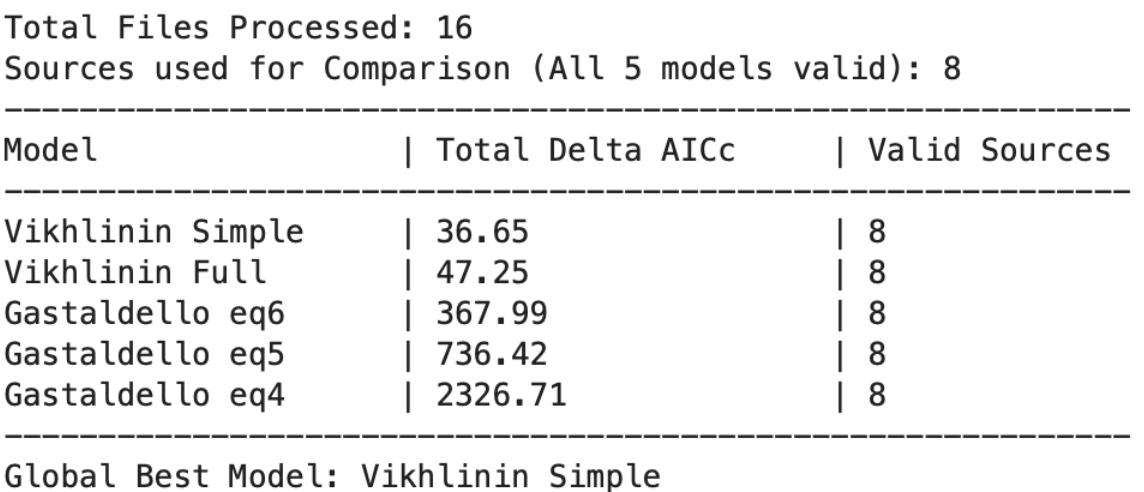

# 3: So what? (What does it mean?)
## Describe your results

3.1: **Global Best Model**: The **Vikhlinin Simple** model (with $a=0, b=2$) emerged as the most statistically reliable, with a total $\Delta AIC_c$ of 36.65. 

3.2: **Gastaldello Model Issues**: The Gastaldello et al. models (Eq 4, 5, 6) showed significantly higher $\Delta AIC_c$ scores (ranging from ~367 to over 2300), suggesting they are over-parameterized for these specific X-ray sources.

3.3: **Visualization**: The plot below shows that while complex models may fit points better visually, they often fail the AICc test due to the risk of overfitting.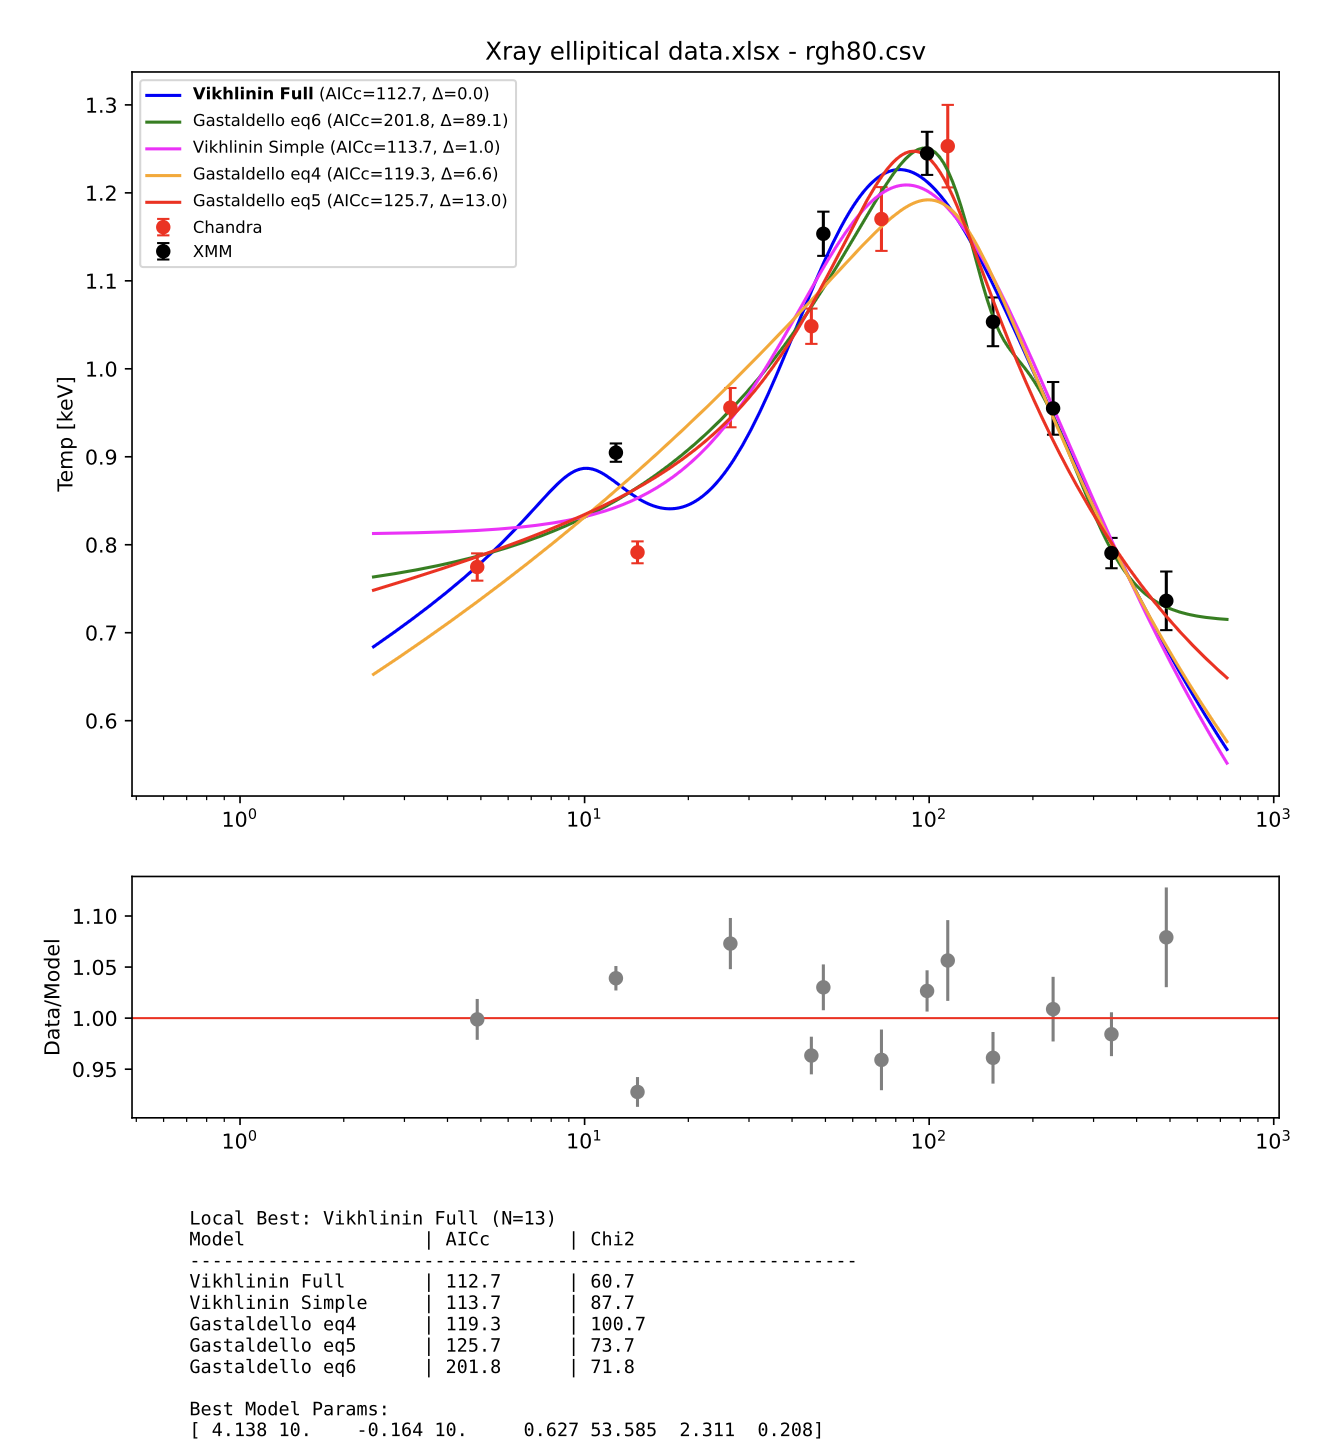

# 4. Now what? (What's next?)
## Plan for the next week

4.1: To further reduce the risk of overfitting and minimize the global $\Delta AIC_c$, I will implement the methods suggested by **Landry et al. (2013)**.

4.2: We need to obtain a model with a **Total $\Delta AIC_c < 16$** for the comparison set (8 sources). This would result in an average $\Delta AIC_c < 2$ per source, indicating that the model has substantial empirical support and minimal overfitting.

4.3: We will use the most reasonable model to extend the temperature profile fitting to the **Humphrey et al. (2006)** dataset.



# 5. Bibliography

5.1: Vikhlinin  et al. (2006). *CHANDRA SAMPLE OF NEARBY RELAXED GALAXY CLUSTERS: MASS, GAS FRACTION, AND
MASS-TEMPERATURE RELATION*.

5.2: Gastaldello et al. (2007). *PROBING THE DARK MATTER AND GAS FRACTION IN RELAXED GALAXY GROUPS WITH X-RAY
OBSERVATIONS FROM Chandra AND XMM*. 

5.3: Humphrey et al. (2006). *A CHANDRA VIEW OF DARK MATTER IN EARLY-TYPE GALAXIES*.

5.4: Landry et al. (2013). *CHANDRA MEASUREMENTS OF A COMPLETE SAMPLE OF X-RAY LUMINOUS GALAXY CLUSTERS: THE GAS MASS FUNCTION*.
